In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

%matplotlib inline
plt.style.use('fivethirtyeight')

df = pd.read_csv('../data/boston_housing.csv')

In [21]:
df = pd.read_csv('../data/boston_housing.csv')

In [22]:
X = df.loc[:, df.columns != 'PRICE']
y = df['PRICE']
X = (X - X.mean()) / X.std()

In [23]:
lr = LinearRegression()
lr.fit(X,y)
lr.score(X,y)

0.7406426641094095

In [24]:
coeffs = pd.DataFrame({
    'Vars': X.columns,
    'Weight': lr.coef_
}).sort_values(by='Weight', ascending=False)

coeffs

,Vars,Weight
5,RM,2.676877
8,RAD,2.664852
1,ZN,1.082639
11,B,0.850109
3,CHAS,0.682414
2,INDUS,0.141039
6,AGE,0.019485
0,CRIM,-0.929065
4,NOX,-2.058754
10,PTRATIO,-2.062646


In [25]:
df['prediction'] = lr.predict(X)

In [26]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,prediction
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


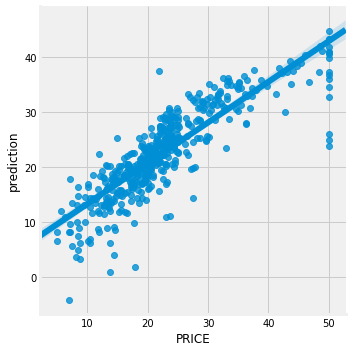

In [27]:
sns.lmplot(x='PRICE',
           y='prediction',
           data=df);

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state=2019)

In [29]:
X_train.shape

(404, 13)

In [30]:
X_test.shape

(102, 13)

In [31]:
y_train.shape

(404,)

In [32]:
y_test.shape

(102,)

In [35]:
lr.fit(X_train, y_train)
print("Train Score: {}, Test Score: {}".format(lr.score(X_train, y_train), lr.score(X_test, y_test)))

Train Score: 0.7581321815069204, Test Score: 0.617406599912789


In [45]:
scores = cross_val_score(estimator = lr,
                         X=X_train, 
                         y=y_train,
                         cv = 10)

In [46]:
scores

array([0.74469313, 0.72965599, 0.78482663, 0.65675571, 0.66315517,
       0.78283033, 0.81788242, 0.79596427, 0.5480151 , 0.75188945])

In [52]:
np.mean(scores)

0.7275668192780949

In [53]:
np.std(scores)

0.07839580317172444

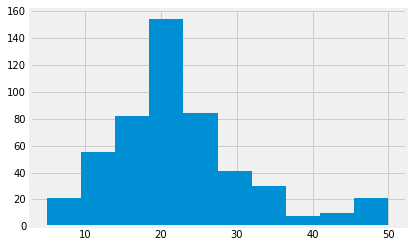

In [67]:
y.hist();

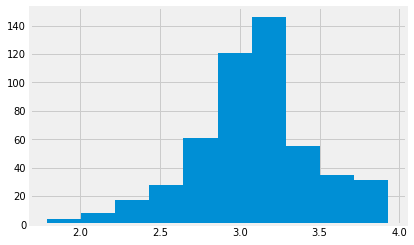

In [68]:
y_log = np.log1p(y)
y_log.hist();

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_log, 
                                                    test_size = 0.2, 
                                                    random_state=2019)

In [105]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [106]:
scores = cross_val_score(estimator = lr,
                         X=X_train, 
                         y=y_train,
                         cv = 10)

In [107]:
scores

array([0.81066965, 0.78080019, 0.78969268, 0.72301188, 0.72305225,
       0.81510248, 0.84755808, 0.81720277, 0.69862075, 0.79529768])

In [108]:
np.mean(scores)

0.7801008400068826

In [109]:
np.std(scores)

0.04643568802773349

In [110]:
np.mean(scores) + 2 * np.std(scores)

0.8729722160623496

In [111]:
np.mean(scores) - 2 * np.std(scores)

0.6872294639514156

In [118]:
SSres = np.sum((lr.predict(X_test) - y_test)**2)
SStot = np.sum((y_test - y_test.mean())**2)

In [119]:
SSres

4.223903571744031

In [120]:
SStot

13.454244382419853

In [121]:
lr.score(X_test, y_test)

0.6860541958593196

In [130]:
rreg = Ridge()

In [128]:
alphas = np.logspace(-4, 4, 9)

In [131]:
rreg_scores = []

for a in alphas:
    rreg.set_params(alpha = a)
    scores = cross_val_score(estimator = rreg, X=X_train, y = y_train, cv = 10)
    rreg_scores.append((np.mean(scores), a))

In [145]:
max(rreg_scores)

(0.7820647667994132, 10.0)

In [141]:
lasr = Lasso()

In [142]:
lasr_scores = []

for a in alphas:
    lasr.set_params(alpha = a)
    scores = cross_val_score(estimator = lasr, X=X_train, y = y_train, cv = 10)
    lasr_scores.append((np.mean(scores), a))

In [144]:
max(lasr_scores)

(0.7814572182231375, 0.001)

In [153]:
rreg.set_params(alpha = 10.0)
rreg.fit(X_train, y_train)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [154]:
rreg.score(X_test, y_test)

0.6825821601357429